<a href="https://colab.research.google.com/github/Aakash7khadka/Dl_withTensorflow/blob/main/Scratch_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import tensorflow as tf
import numpy as np 
import random
import matplotlib.pyplot as plt

In [54]:
#y=WX+b
def synthetic_data(w,b,num_examples):
  X=tf.zeros((num_examples,w.shape[0]))
  X=tf.random.normal(shape=X.shape)
  y=tf.matmul(X,tf.reshape(w,(X.shape[1],-1)))+b
  return X,y




true_w=tf.constant([2,-3.14])
true_b=4.2
synthetic_data(true_w,true_b,10)


(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
 array([[ 1.4681964 ,  0.17787707],
        [-0.05863094,  1.0864481 ],
        [ 1.1843045 ,  0.51023   ],
        [ 0.08131786,  0.34896803],
        [-1.2388889 , -1.0095463 ],
        [-0.22999854,  0.94257885],
        [ 1.2770703 , -0.19264908],
        [ 1.1752777 , -0.36756313],
        [ 0.96793044,  1.0510114 ],
        [ 0.59473485, -0.5561898 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[6.577859 ],
        [0.6712909],
        [4.9664865],
        [3.2668757],
        [4.8921976],
        [0.7803049],
        [7.3590584],
        [7.7047033],
        [2.8356848],
        [7.1359053]], dtype=float32)>)

In [55]:
features,labels=synthetic_data(true_w,true_b,1000)

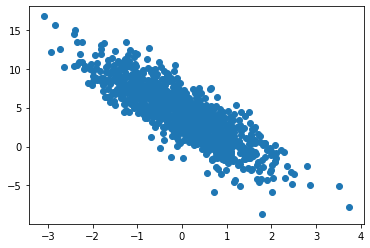

In [56]:
plt.scatter(features[:,1],labels)

In [57]:
def data_iter(features,labels,batch_size):
  n=len(features)
  indices=list(range(n))
  random.shuffle(indices)
  for i in range(0,n,batch_size):
    j=tf.constant(indices[i:min(i+batch_size,n)])
    yield tf.gather(features,j),tf.gather(labels,j)

In [58]:
for X,y in data_iter(features,labels,10):
  print(X,y)
  break

tf.Tensor(
[[-0.20573564  0.98208785]
 [ 0.2943914   0.4105503 ]
 [ 0.7168842  -0.44536713]
 [ 1.6747911   0.8592151 ]
 [-0.7423156   0.874748  ]
 [-0.72586375 -0.07086498]
 [-1.5275283  -0.8161942 ]
 [-0.44184858  0.37693426]
 [ 0.03345824  0.28872633]
 [ 1.1178082   0.05667622]], shape=(10, 2), dtype=float32) tf.Tensor(
[[ 0.7047725 ]
 [ 3.4996548 ]
 [ 7.032221  ]
 [ 4.8516464 ]
 [-0.03134012]
 [ 2.9707885 ]
 [ 3.707793  ]
 [ 2.132729  ]
 [ 3.3603156 ]
 [ 6.257653  ]], shape=(10, 1), dtype=float32)


In [59]:
#initializing model parameters
w=tf.Variable(tf.random.normal((2,1),mean=0,stddev=0.01),trainable=True)
b=tf.Variable(tf.ones(1),trainable=True)

In [60]:
#training function 
def linreg(X,w,b):
  return tf.matmul(X,w)+b

In [61]:
#loss function 
def loss(y_hat,y):
  return (y_hat-tf.reshape(y,y_hat.shape))**2/2

In [62]:
#gradient descent function 
def sgd(lr,params,grads,batch_size):
  for param,grad in zip(params,grads):
    param.assign_sub(lr*grad/batch_size)

In [63]:
lr=0.01
batch_size=10
for epoch in range(5):
  for X,y in data_iter(features,labels,batch_size):
    with tf.GradientTape() as g:
      l=loss(linreg(X,w,b),y)

      dw,db=g.gradient(l,[w,b])
      sgd(lr,[w,b],[dw,db],batch_size)
  training_loss=loss(linreg(features,w,b),labels)
  print(f"Epochs{epoch} loss:{tf.reduce_mean(training_loss)}")
    

Epochs0 loss:1.5918720960617065
Epochs1 loss:0.20814445614814758
Epochs2 loss:0.02729170210659504
Epochs3 loss:0.003585210768505931
Epochs4 loss:0.00047269155038520694
